# **ES114 Probability Lab Assignment 7 - Two Discrete RVs**
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**By Karan Sagar Gandhi (23110157)**

In this notebook I have done the following:

1. Determined if the given Joint PMF is made up of Independent or dependent random variables or not.
2. Made a 3D plot of the Joint PMFs and Joint PMFs.
3. Plotted the Marginal PMFs and CDFs of the given Joint PMFs
4. Determined the Covariance of the given distribution. The covariance of a given joint distribution is defined by:

$$Cov(X, Y) = E[(X - E[X])(Y - E[Y])]$$

## Importing Libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import math
from google.colab import output # To disable scrolling in the cells

## Defining general functions for plotting the Distributions
Here I define general functions to Plot Graphs and Distributions
* **Plot3D:** Plots the the given joint distributions in 3d.
* **PlotGraphs:** This will plot bar graphs for the given 1d distributions.
* **PrintJointDistribution:** This will print the given PMF in a specific format

In [ ]:
eps = 1e-7

def Plot3D(values_arr, titles):
  fig = plt.figure(figsize=(7 * len(values_arr), 7))
  for i in range(len(values_arr)):
    ax = fig.add_subplot(100 + len(values_arr) * 10 + i + 1, projection='3d')
    ax.set_title(titles[i])
    values = values_arr[i]
    x_values, y_values = np.meshgrid(np.arange(values.shape[0]), np.arange(values.shape[1]))
    x, y = x_values.ravel(), y_values.ravel()
    ax.bar3d(x, y, np.zeros_like(values).ravel(), 1, 1, values.ravel(), shade=True)
  fig.show()

def PlotGraphs(pmfs, titles):
  fig, ax = plt.subplots(1, len(pmfs), figsize=(len(pmfs) * 7, 7))
  for i in range(len(pmfs)):
    ax[i].bar([str(i) for i in np.arange(len(pmfs[i]))], pmfs[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Random variable')
    ax[i].set_ylabel('Probability')

  fig.show()

def PrintJointDistribution(distribution):
  print("R.V.", end="")
  for y in range(distribution.shape[0]):
      print(f"{y:>10}", end="")
  print()
  for i, row in enumerate(distribution):
      print(f"{i:<4}", end="")
      for prob in row:
          print(f"{prob:>10.4f}", end="")
      print()

## Checking if a given PMF is Independent and calculating the PMFs

We know that two random variables X and Y are independent when:

$$p_{XY}(x, y) = P(X = x \cap Y = y) = p_X(x) \cdot p_Y(y), \ \forall \text{ values of x and y}$$

So to check if the given joint PMF is independent, we can calculate the marginal PMFs and check for the above condition.

To calculate the joint PMF, we can use the following relation:

$$p_X(x) = \sum_y \ p_{XY}(x, y)$$

$$p_Y(y) = \sum_x \ p_{XY}(x, y)$$

In [ ]:
def CalculateMarginalPMFs(joint_pmf):
  marginal_x = np.zeros(joint_pmf.shape[0])
  marginal_y = np.zeros(joint_pmf.shape[1])

  for i in range(joint_pmf.shape[0]):
    for j in range(joint_pmf.shape[1]):
      marginal_x[i] += joint_pmf[i, j]
      marginal_y[j] += joint_pmf[i, j]

  return marginal_x, marginal_y

def IsJointRandomPMFIndependent(joint_pmf):
  marginal_x, marginal_y = CalculateMarginalPMFs(joint_pmf)

  for i in range(joint_pmf.shape[0]):
    for j in range(joint_pmf.shape[1]):
      if abs(marginal_x[i] * marginal_y[j] - joint_pmf[i, j]) > eps:
        return False

  return True

def CalculateCDF(joint_pmf):
  cdf = np.zeros_like(joint_pmf)

  for i in range(joint_pmf.shape[0]):
    for j in range(joint_pmf.shape[1]):
      if i == 0 and j == 0:
        cdf[i, j] = joint_pmf[i, j]
      elif i == 0:
        cdf[i, j] = joint_pmf[i, j] + cdf[i, j - 1]
      elif j == 0:
        cdf[i, j] = joint_pmf[i, j] + cdf[i - 1, j]
      else:
        cdf[i, j] = cdf[i, j - 1] + cdf[i - 1, j] - cdf[i - 1, j - 1] + joint_pmf[i, j]

  return cdf

## Calculating the Expectation of the Marginal PMFs and Covariance of the joint PMF

Here in this section I define functions that will calculate the Expectation and the Covariance (which the given formula in the assignment equals). We can use the definition of covariance:

$$Cov(X, Y) = E[(X - E[X])(Y - E[Y])]$$
We can further simplify the given relation to:

$$Cov(X, Y) = E(XY) \ - \ E(X)E(Y)$$

In [ ]:
def CalculateExpectation(pmf):
  return np.sum(np.arange(len(pmf)) * pmf)

def CalculateCovariance(joint_pmf, verbose=False):
  covariance = 0

  marginal_x, marginal_y = CalculateMarginalPMFs(joint_pmf)
  E_x = CalculateExpectation(marginal_x)
  E_y = CalculateExpectation(marginal_y)

  for i in range(joint_pmf.shape[0]):
    for j in range(joint_pmf.shape[1]):
      covariance += (i - E_x) * (j - E_y) * joint_pmf[i, j]

  if verbose:
    print("Expectation of X is:", E_x)
    print("Expectation of Y is:", E_y)

  return covariance

## Applying the above functions

In this section I apply all the functions that I have defined above. I define 2 more functions:

* **DescribeJointPMF:** This will print if the PMF is independent, print the marginal PMFs, the covariance of the given joint PMF, the 3d plots of the joint PMF and joint CDF, and the Marginal PMF and CDF for both the random variables

* **InputAndPlotJointPMF:** This will take the range of X and Y and the joint PMF as the input and describes it.

In [ ]:
def DescribeJointPMF(joint_pmf):
  PrintJointDistribution(joint_pmf)
  if IsJointRandomPMFIndependent(joint_pmf):
    print("The given Joint PMF is made of independent random variables X and Y")
  else:
    print("The given Joint PMF is not made of independent random variables X and Y")

  marginal_x, marginal_y = CalculateMarginalPMFs(joint_pmf)
  print("The marginal PMF of X is:", marginal_x)
  print("The marginal PMF of Y is:", marginal_y)

  covariance = CalculateCovariance(joint_pmf, verbose=True)
  print("The Covariance of the given joint PMF of X and Y is:", covariance)

  joint_cdf = CalculateCDF(joint_pmf)
  Plot3D([joint_pmf, joint_cdf], ['Joint PMF', 'Joint CDF'])
  PlotGraphs([marginal_x, np.cumsum(marginal_x), marginal_y,  np.cumsum(marginal_y)], ['Marginal PMF of X', 'Marginal CDF of X', 'Marginal PMF of Y', 'Marginal CDF of Y'])

def InputAndPlotJointPMF():
  n = int(input("Enter the number of random values for X: "))
  m = int(input("Enter the number of random values for Y: "))

  pmf = np.zeros((n, m))

  print("Enter the values sepearated by a space")
  for i in range(n):
    pmf[i] = [float(i) for i in input().split()]

  DescribeJointPMF(pmf)

### DescribeJointPMF Calling it on a uniform random distribution

<IPython.core.display.Javascript object>

R.V.         0         1         2         3
0       0.0180    0.1090    0.0452    0.0621
1       0.0805    0.0836    0.0142    0.0081
2       0.1198    0.0269    0.0685    0.0233
3       0.0802    0.0820    0.1225    0.0561
The given Joint PMF is not made of independent random variables X and Y
The marginal PMF of X is: [0.23435292 0.18631843 0.23848102 0.34084763]
The marginal PMF of Y is: [0.29848107 0.30152986 0.25044112 0.14954795]
Expectation of X is: 1.6858233490776757
Expectation of Y is: 1.2510559559335805
The Covariance of the given joint PMF of X and Y is: -0.019427822871482175


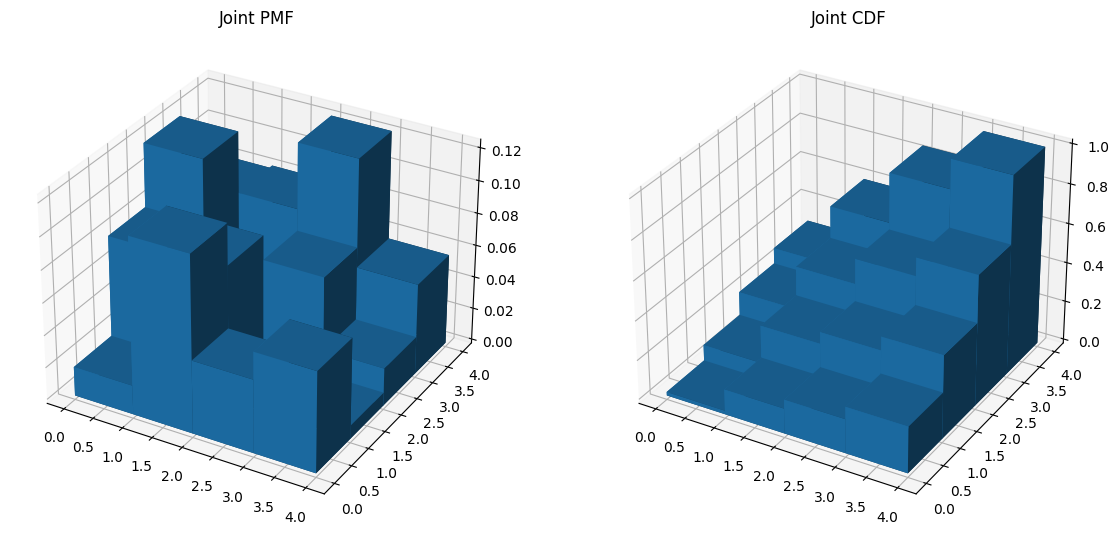

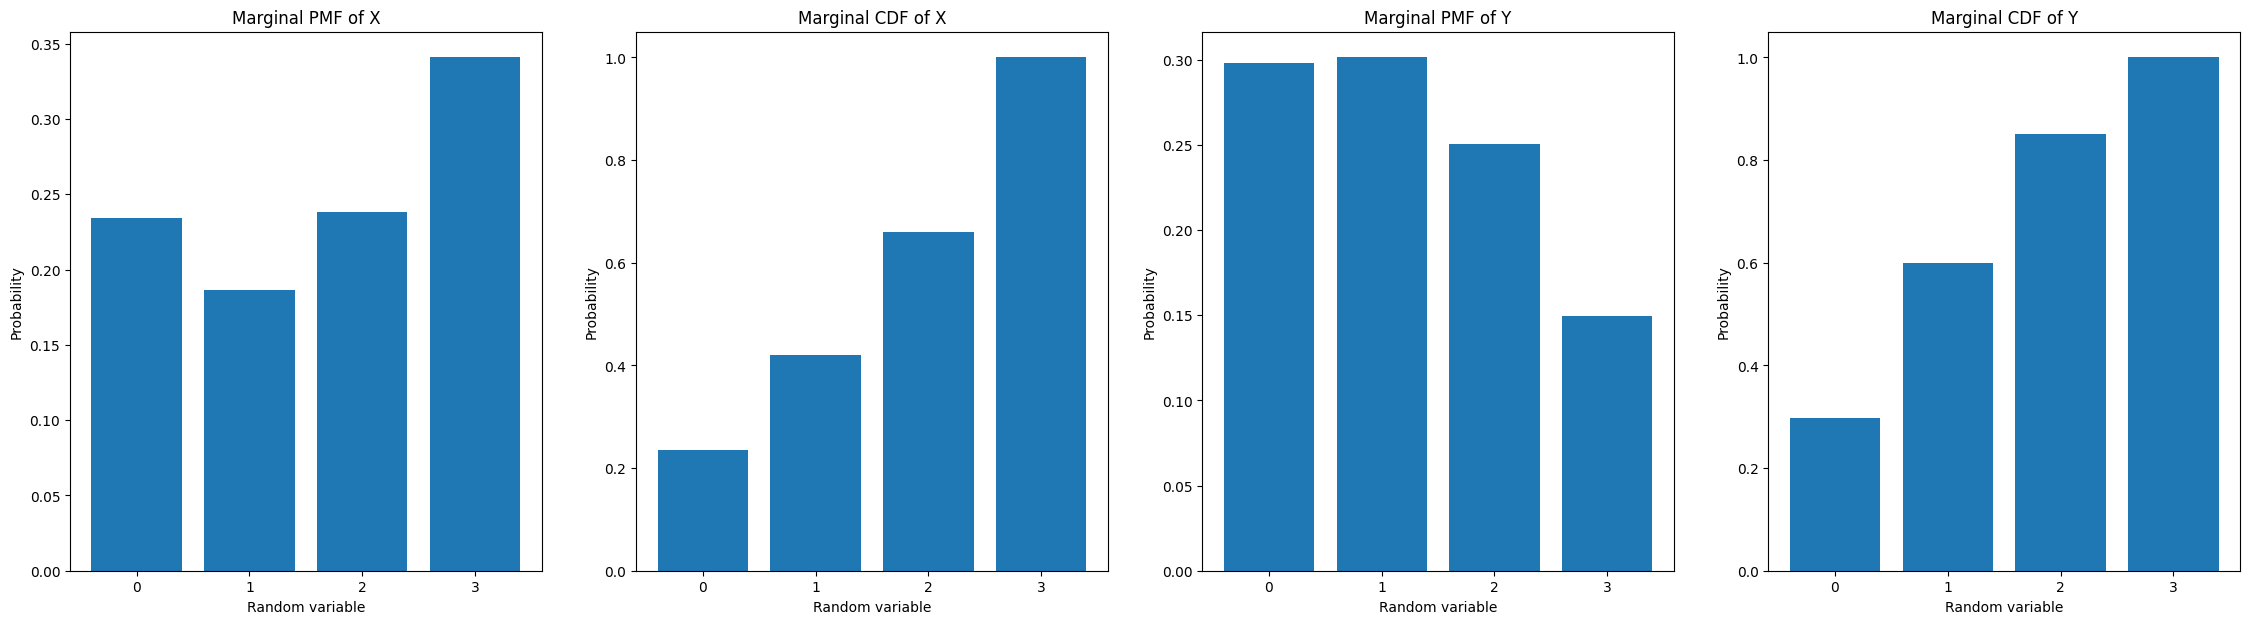

In [ ]:
output.no_vertical_scroll()
pmf = np.random.uniform(size=(4, 4))
DescribeJointPMF(pmf / pmf.sum())

### Taking input from the user and Describing the joint PMFs

<IPython.core.display.Javascript object>

Enter the number of random values for X: 2
Enter the number of random values for Y: 2
Enter the values sepearated by a space
0 0
0 1
R.V.         0         1
0       0.0000    0.0000
1       0.0000    1.0000
The given Joint PMF is made of independent random variables X and Y
The marginal PMF of X is: [0. 1.]
The marginal PMF of Y is: [0. 1.]
Expectation of X is: 1.0
Expectation of Y is: 1.0
The Covariance of the given joint PMF of X and Y is: 0.0


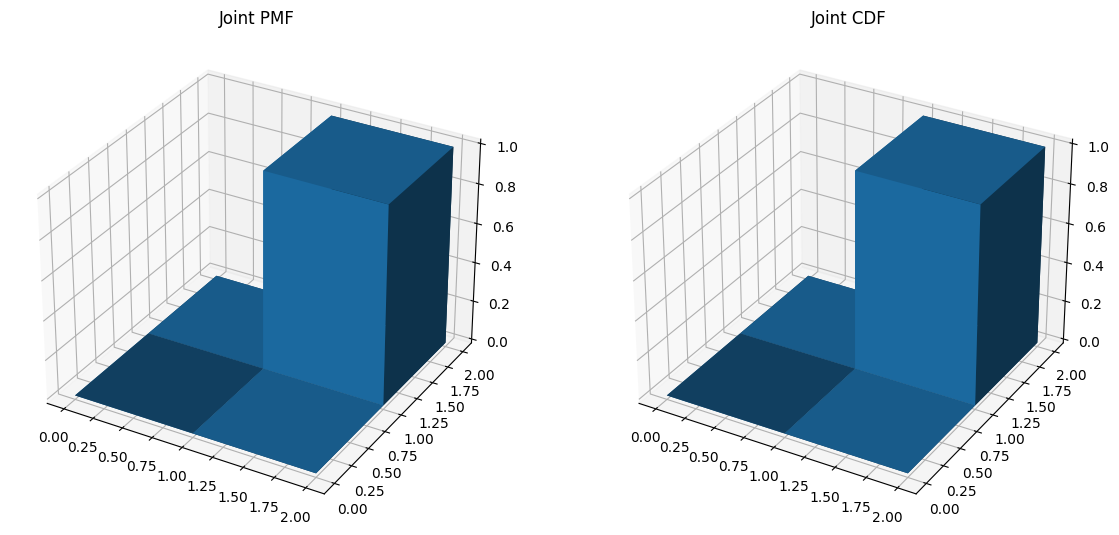

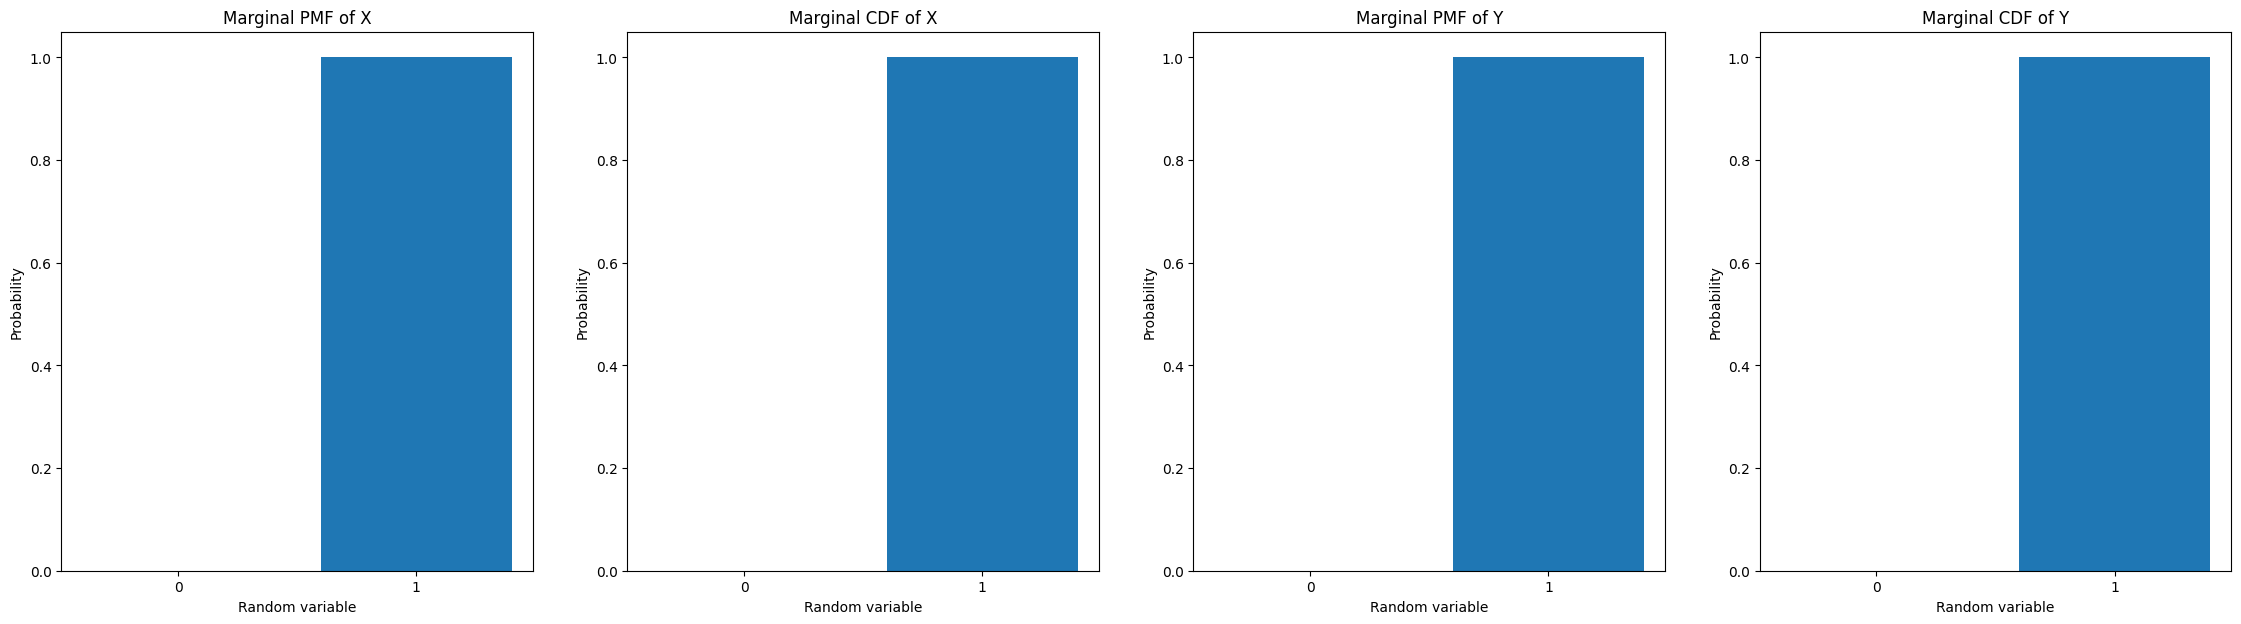

In [ ]:
output.no_vertical_scroll()
InputAndPlotJointPMF()

<IPython.core.display.Javascript object>

Enter the number of random values for X: 2
Enter the number of random values for Y: 2
Enter the values sepearated by a space
0 0.25
0.25 0.5
R.V.         0         1
0       0.0000    0.2500
1       0.2500    0.5000
The given Joint PMF is not made of independent random variables X and Y
The marginal PMF of X is: [0.25 0.75]
The marginal PMF of Y is: [0.25 0.75]
Expectation of X is: 0.75
Expectation of Y is: 0.75
The Covariance of the given joint PMF of X and Y is: -0.0625


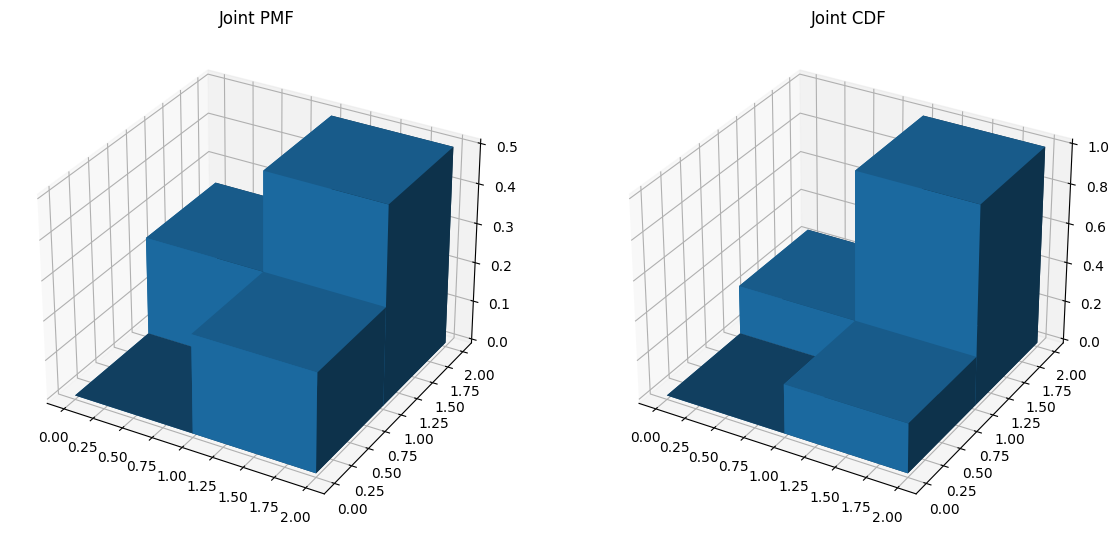

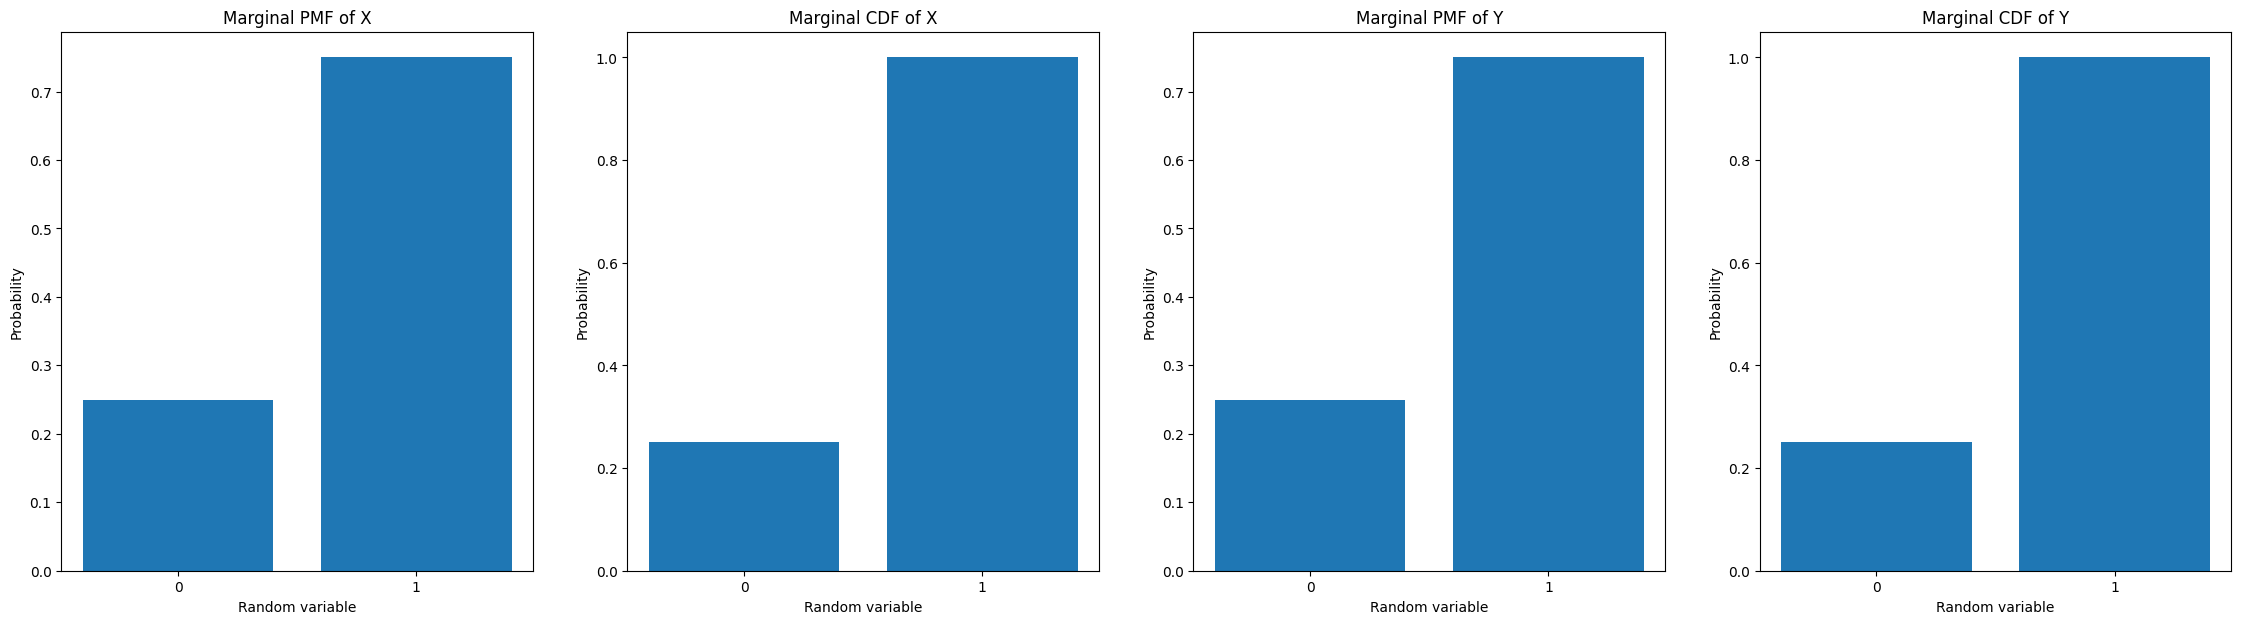

In [ ]:
output.no_vertical_scroll()
InputAndPlotJointPMF()

### Example of a distribution that is made up of independent random variables

<IPython.core.display.Javascript object>

R.V.         0         1
0       0.3200    0.4800
1       0.0800    0.1200
The given Joint PMF is made of independent random variables X and Y
The marginal PMF of X is: [0.8 0.2]
The marginal PMF of Y is: [0.4 0.6]
Expectation of X is: 0.2
Expectation of Y is: 0.6
The Covariance of the given joint PMF of X and Y is: 0.0


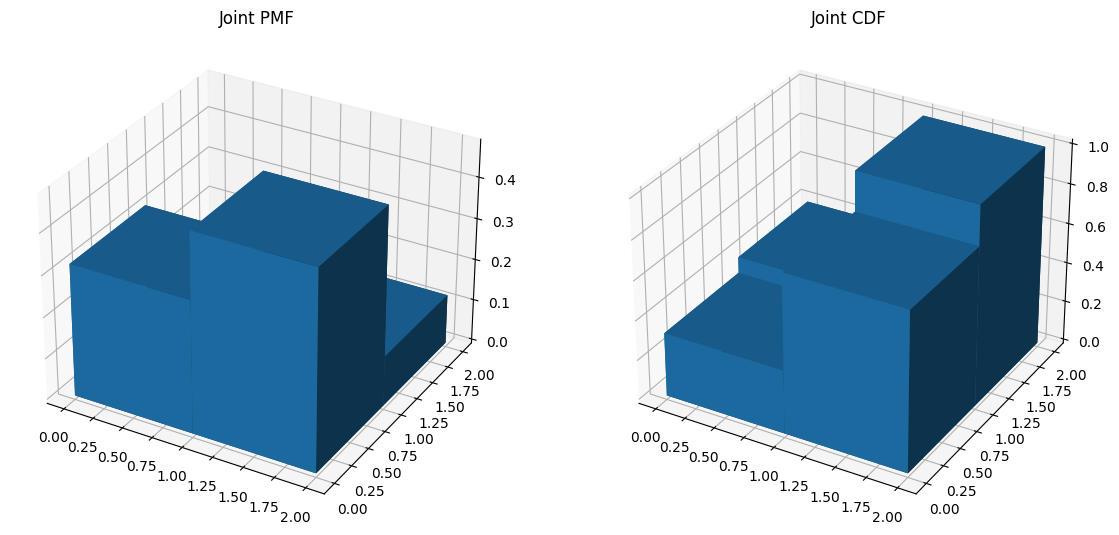

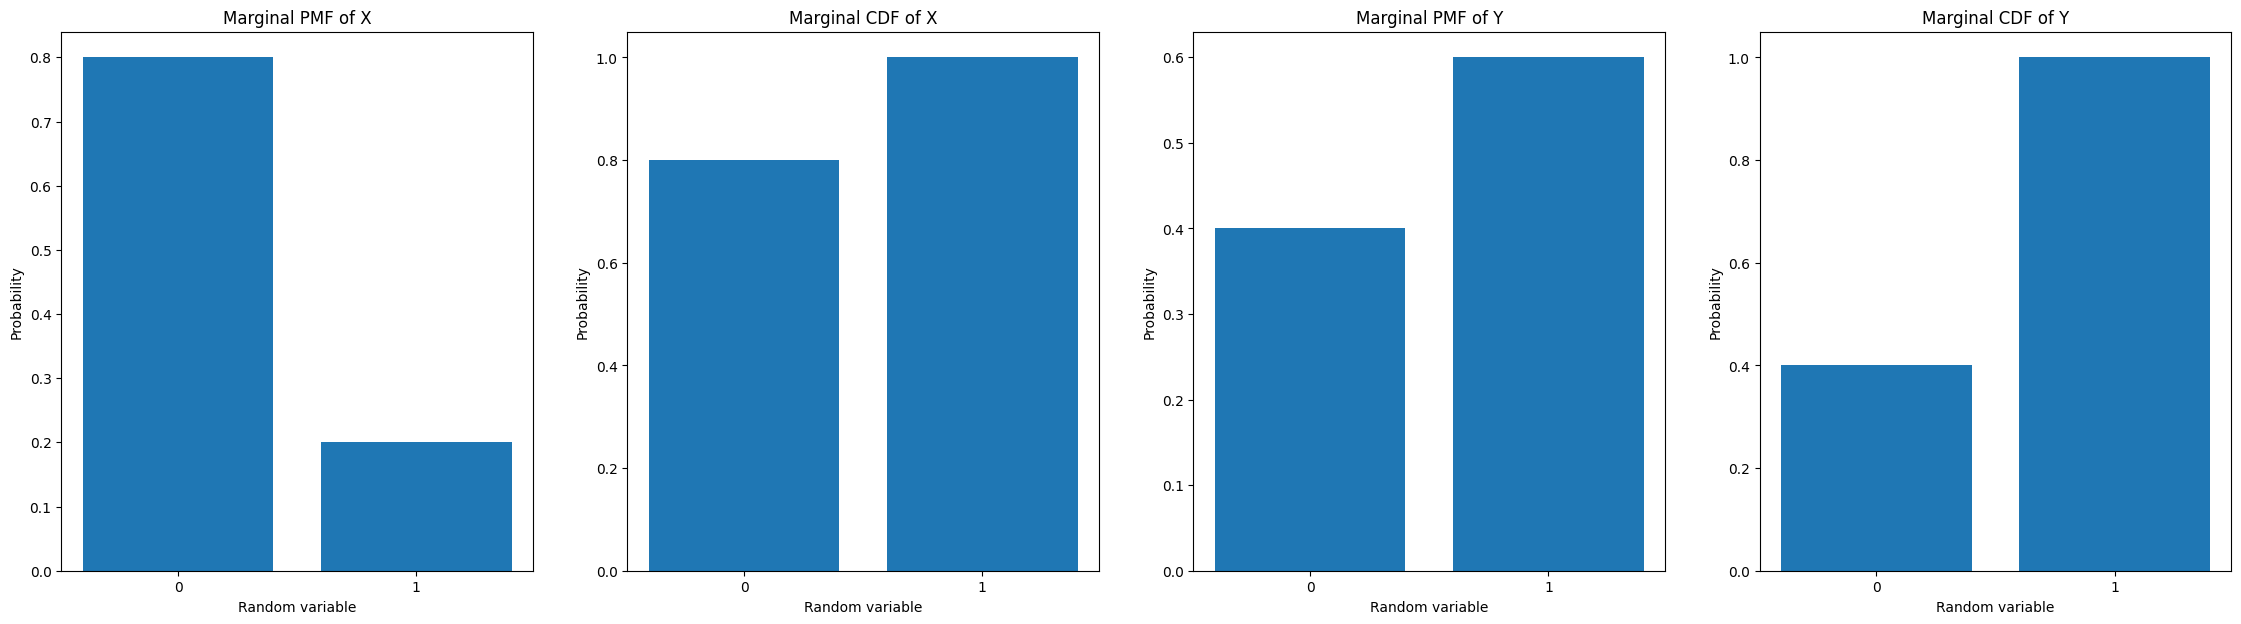

In [ ]:
output.no_vertical_scroll()
DescribeJointPMF(np.array([[0.32, 0.48], [0.08, 0.12]]))

### Example of a distribution that is made up of dependent random variables

<IPython.core.display.Javascript object>

R.V.         0         1
0       0.0000    0.2500
1       0.5000    0.2500
The given Joint PMF is not made of independent random variables X and Y
The marginal PMF of X is: [0.25 0.75]
The marginal PMF of Y is: [0.5 0.5]
Expectation of X is: 0.75
Expectation of Y is: 0.5
The Covariance of the given joint PMF of X and Y is: -0.125


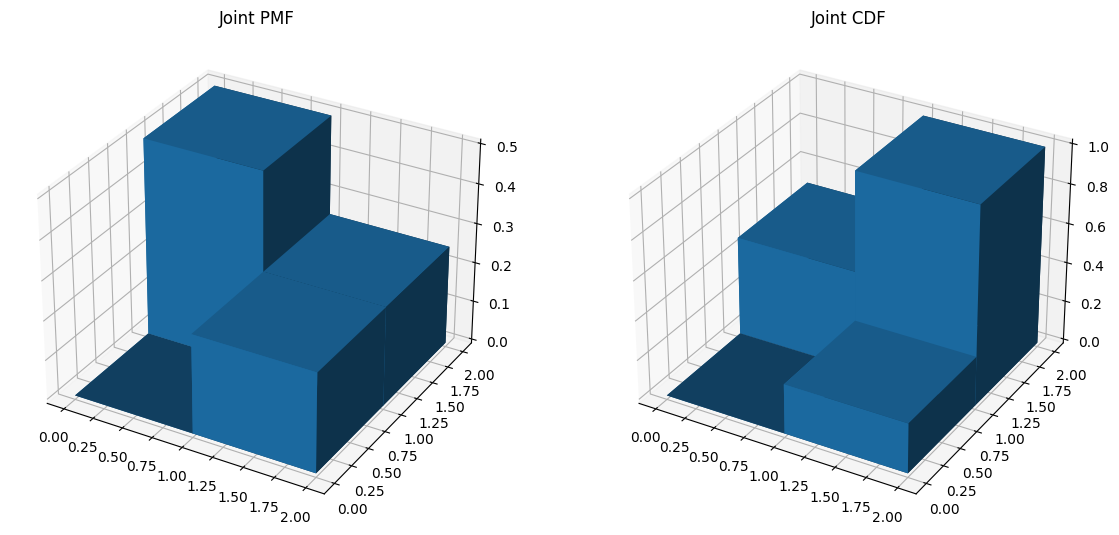

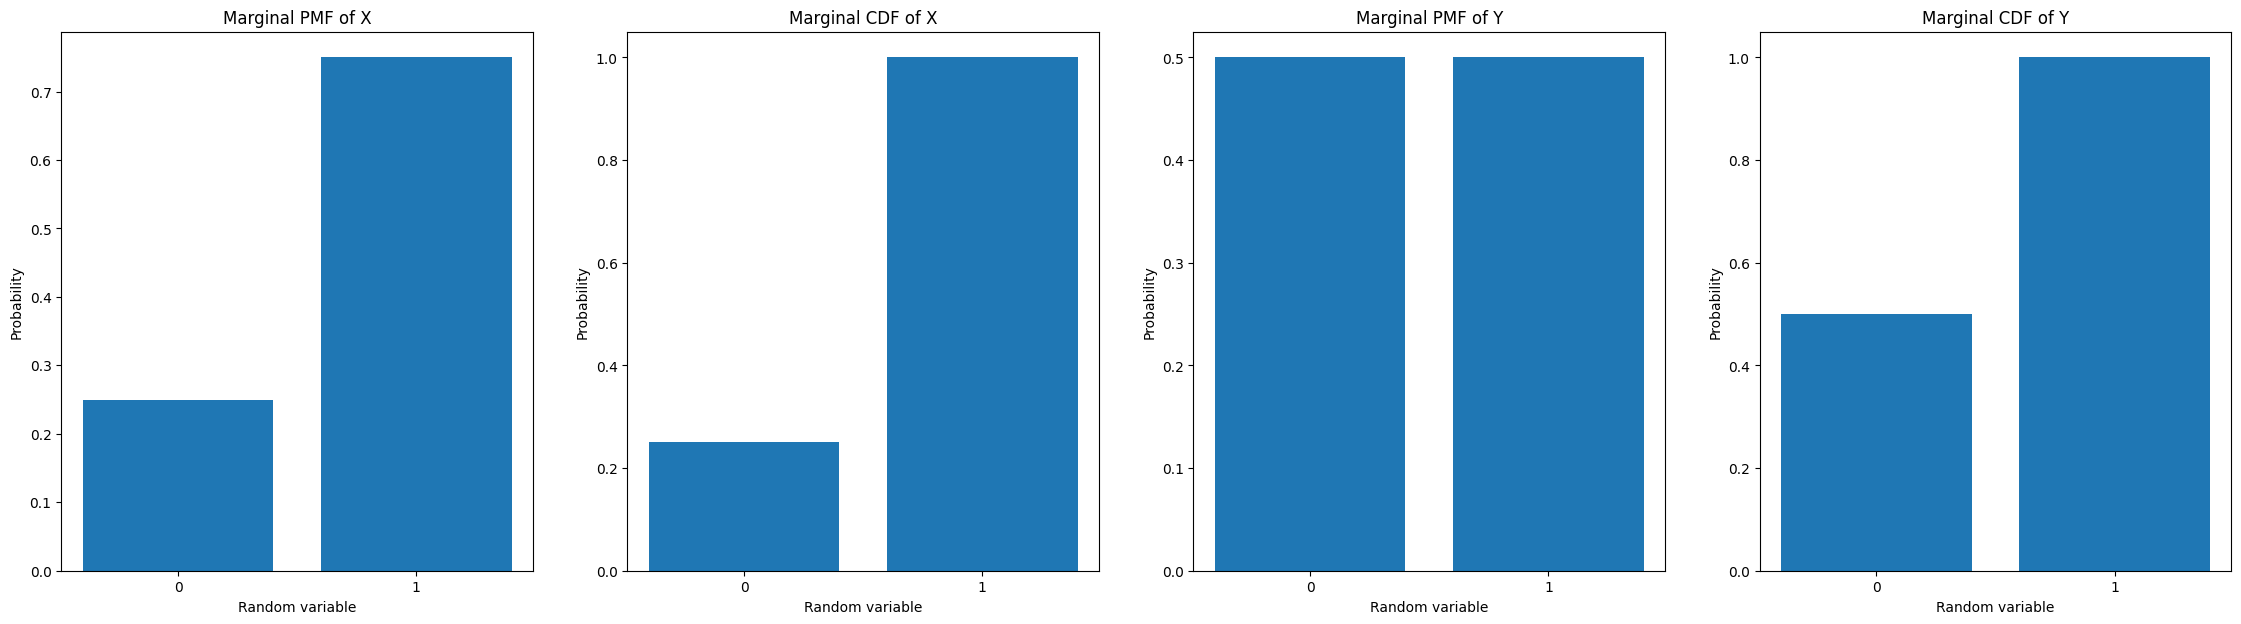

In [ ]:
output.no_vertical_scroll()
DescribeJointPMF(np.array([[0, 0.25], [0.5, 0.25]]))

## Plotting the Joint CDF of the distributions using plot_surface

In this section I plot the CDF of the given PMF using plot_surface.

In [ ]:
def PlotCDF(joint_cdfs, title):
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  ax.set_title(title)
  current_cdf = joint_cdfs
  x_values, y_values = np.meshgrid(np.arange(current_cdf.shape[0]), np.arange(current_cdf.shape[1]))
  surf = ax.plot_surface(x_values, y_values, current_cdf, cmap=cm.coolwarm, linewidth=1, antialiased=False)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter('{x:.02f}')
  fig.colorbar(surf, shrink=0.5, aspect=5)

  fig.show()

<IPython.core.display.Javascript object>

R.V.         0         1         2         3         4
0       0.0000    0.0000    0.0000    0.0000    0.0000
1       0.0000    0.0100    0.0200    0.0300    0.0400
2       0.0000    0.0200    0.0400    0.0600    0.0800
3       0.0000    0.0300    0.0600    0.0900    0.1200
4       0.0000    0.0400    0.0800    0.1200    0.1600
The given Joint PMF is made of independent random variables X and Y
The marginal PMF of X is: [0.  0.1 0.2 0.3 0.4]
The marginal PMF of Y is: [0.  0.1 0.2 0.3 0.4]
Expectation of X is: 3.0
Expectation of Y is: 3.0
The Covariance of the given joint PMF of X and Y is: 0.0


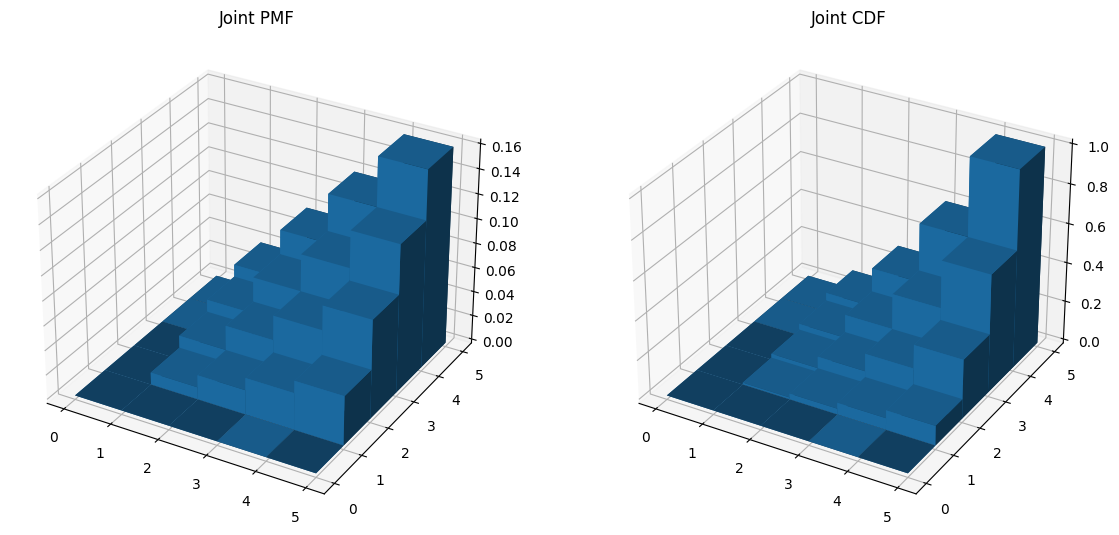

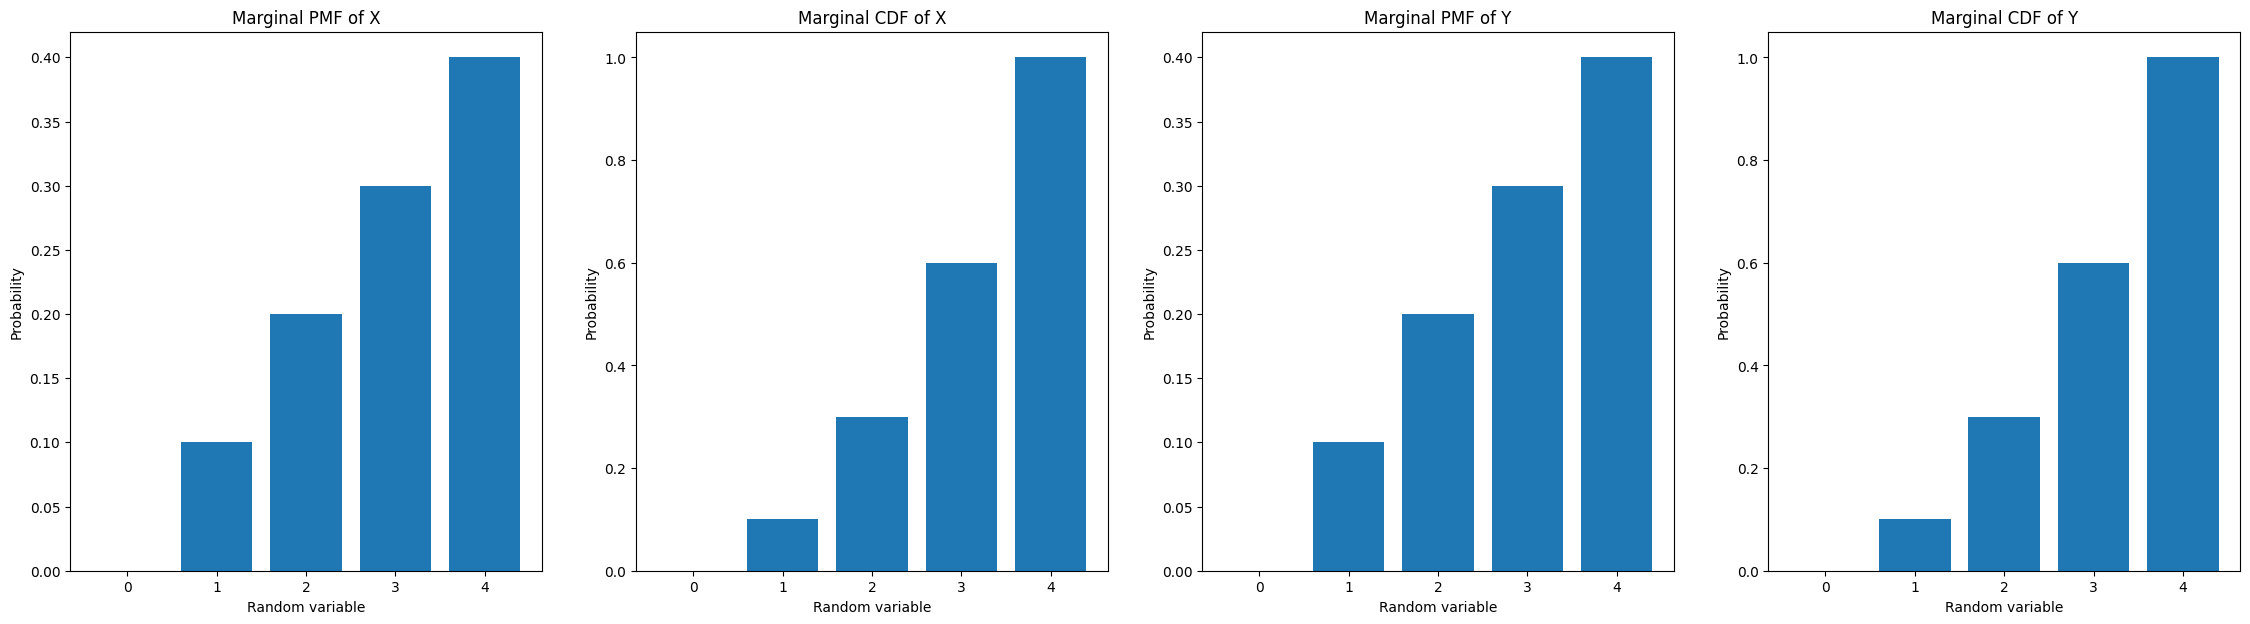

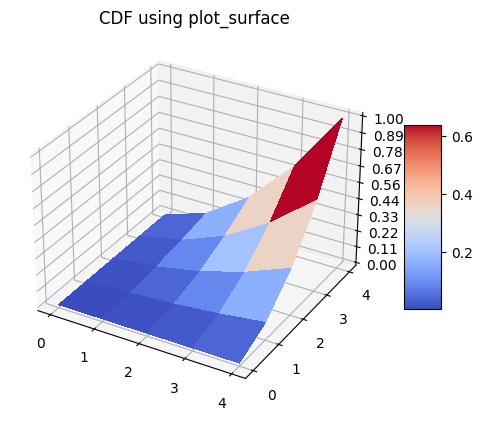

In [ ]:
output.no_vertical_scroll()

pmf = np.array([[i * j for i in range(0, 10, 2)] for j in range(0, 10, 2)], dtype='float64')
cdf = CalculateCDF(pmf)
pmf /= cdf[-1, -1]
cdf /= cdf[-1, -1]

DescribeJointPMF(pmf)
PlotCDF(cdf, "CDF using plot_surface")

<IPython.core.display.Javascript object>

R.V.         0         1         2         3         4         5         6         7         8         9
0       0.0025    0.0075    0.0112    0.0112    0.0084    0.0050    0.0025    0.0011    0.0004    0.0001
1       0.0075    0.0224    0.0335    0.0335    0.0252    0.0151    0.0075    0.0032    0.0012    0.0004
2       0.0112    0.0335    0.0503    0.0503    0.0377    0.0226    0.0113    0.0049    0.0018    0.0006
3       0.0112    0.0335    0.0503    0.0503    0.0377    0.0226    0.0113    0.0049    0.0018    0.0006
4       0.0084    0.0252    0.0377    0.0377    0.0283    0.0170    0.0085    0.0036    0.0014    0.0005
5       0.0050    0.0151    0.0226    0.0226    0.0170    0.0102    0.0051    0.0022    0.0008    0.0003
6       0.0025    0.0075    0.0113    0.0113    0.0085    0.0051    0.0025    0.0011    0.0004    0.0001
7       0.0011    0.0032    0.0049    0.0049    0.0036    0.0022    0.0011    0.0005    0.0002    0.0001
8       0.0004    0.0012    0.0018    0.0018    0.0014 

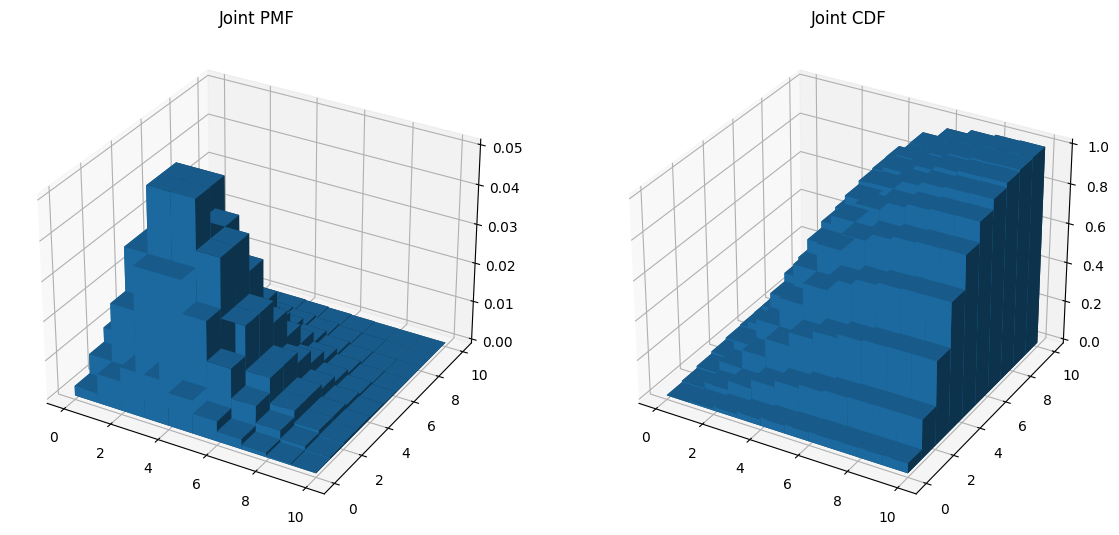

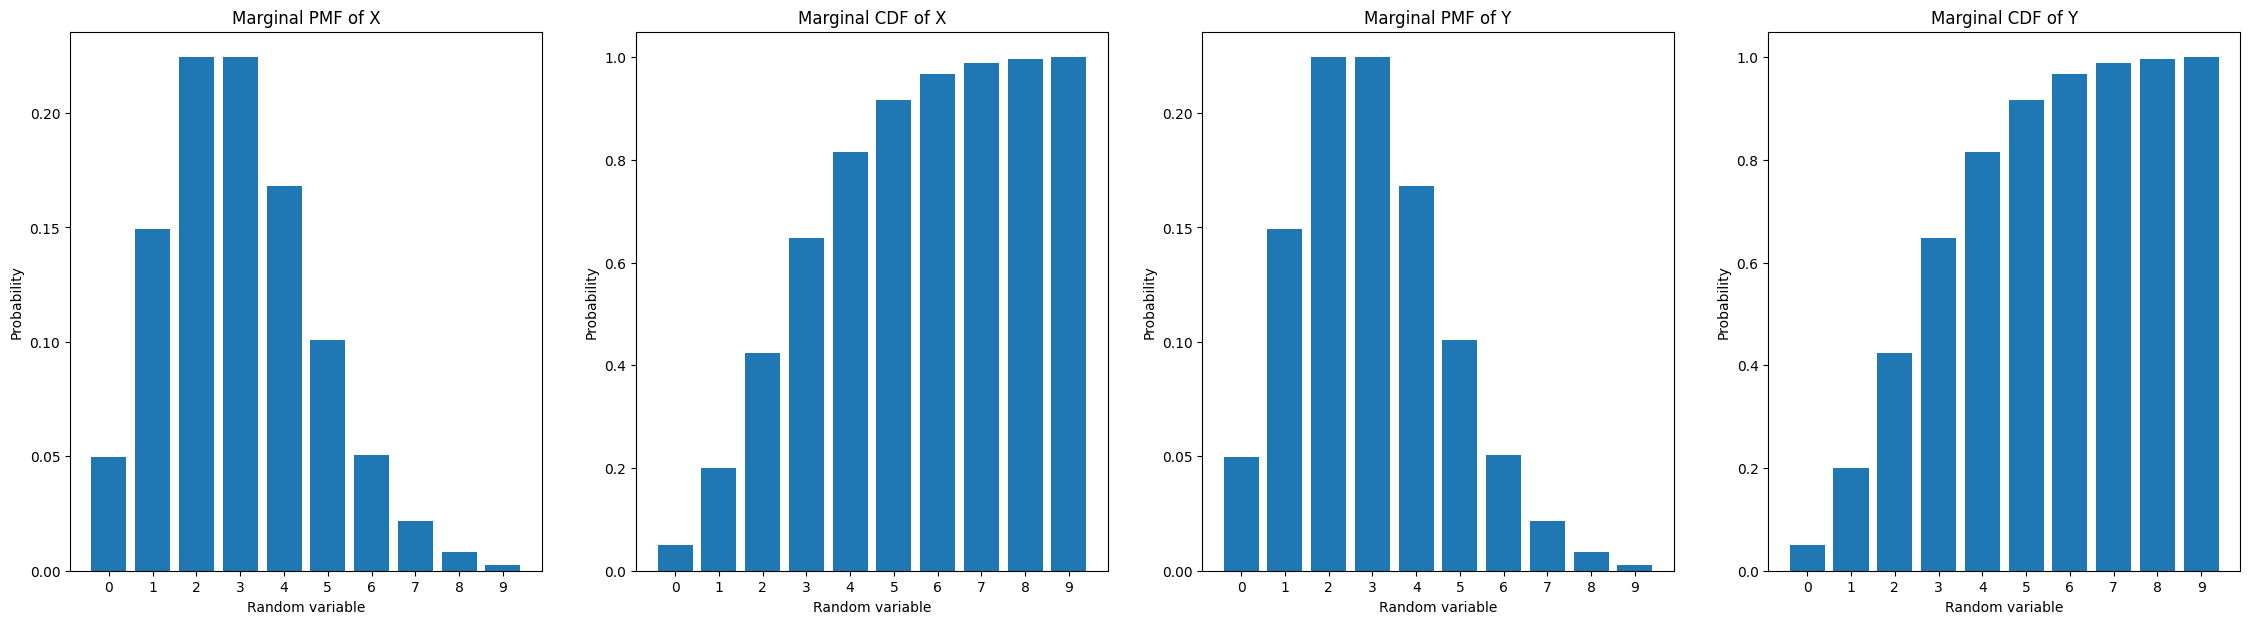

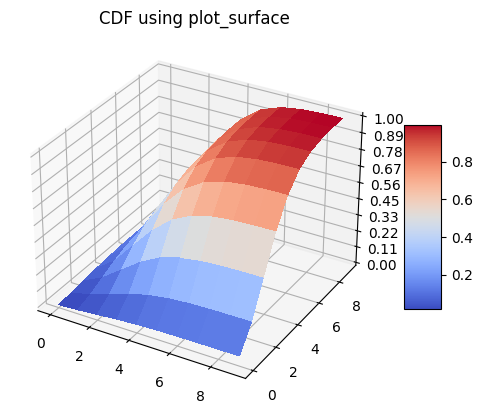

In [ ]:
output.no_vertical_scroll()

def f(x):
  return (3 ** x) * np.exp(-3) / math.factorial(x)

marginal_x = [f(i) for i in range(10)]
marginal_y = [f(i) for i in range(10)]

pmf = np.array([[marginal_x[i] * marginal_y[j] for i in range(10)] for j in range(10)], dtype='float64')
cdf = CalculateCDF(pmf)
pmf /= cdf[-1, -1]
cdf /= cdf[-1, -1]

DescribeJointPMF(pmf)
PlotCDF(cdf, "CDF using plot_surface")

## References
1. “3D surface (colormap) — Matplotlib 3.6.0 documentation,” _matplotlib.org_. https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

2. “Google Colaboratory: Is there any way to expand the height of the result cell of running a code?,” _Stack Overflow_. https://stackoverflow.com/questions/55546869/google-colaboratory-is-there-any-way-to-expand-the-height-of-the-result-cell-of (accessed Mar. 02, 2024).